# **Importing Libraries**

In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import MinMaxScaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

# **Calling dataset and printing**

In [53]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['stocks.csv']))


Saving stocks.csv to stocks (1).csv


In [ ]:
dataset

# **Performing Functions on Dataset**

In [55]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
dataset.tail()

In [57]:
dataset.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

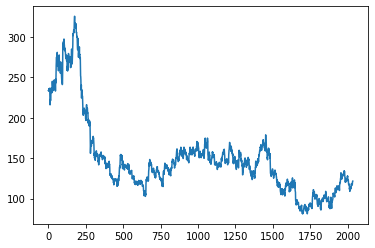

In [65]:
dataset['Close'].plot()

# **Setting features**

In [67]:
output_var = pd.DataFrame(df['Close'])

In [63]:
features = ['Open' , 'High' , 'Low' ,  'Turnover (Lacs)' ]

# **Scaling of data**

In [64]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Turnover (Lacs)
0,0.620235,0.622688,0.621560,0.127882
1,0.622263,0.626144,0.625285,0.212192
2,0.644363,0.639154,0.631078,0.093535
3,0.617194,0.625940,0.629009,0.098117
4,0.618208,0.635902,0.623836,0.142907


# **Training of Model**

In [69]:
time_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [70]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

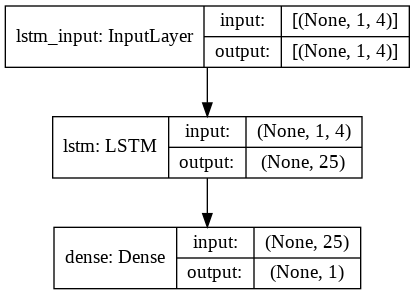

In [71]:
lstm = Sequential()
lstm.add(LSTM(25, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [73]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 2ms/step - loss: 25809.5098
Epoch 2/100
232/232 [==============================] - 0s 2ms/step - loss: 25104.7656
Epoch 3/100
232/232 [==============================] - 0s 2ms/step - loss: 22754.4414
Epoch 4/100
232/232 [==============================] - 0s 2ms/step - loss: 19075.5762
Epoch 5/100
232/232 [==============================] - 1s 2ms/step - loss: 14782.0625
Epoch 6/100
232/232 [==============================] - 0s 2ms/step - loss: 10593.5537
Epoch 7/100
232/232 [==============================] - 0s 2ms/step - loss: 6983.4062
Epoch 8/100
232/232 [==============================] - 0s 2ms/step - loss: 4191.9136
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 2263.0332
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 1088.0781
Epoch 11/100
232/232 [==============================] - 0s 2ms/step - loss: 468.2444
Epoch 12/100
232/232 [==============================] - 0s

# **LSTM Prediction**

In [74]:
y_pred= lstm.predict(X_test)
y_pred

array([[101.75979 ],
       [102.62673 ],
       [106.965775],
       [107.37964 ],
       [105.72395 ],
       [105.142624],
       [101.163956],
       [ 98.68027 ],
       [ 97.12701 ],
       [ 96.99391 ],
       [ 97.35133 ],
       [ 97.82914 ],
       [ 99.002625],
       [ 98.39102 ],
       [ 97.56846 ],
       [ 98.09235 ],
       [ 98.34974 ],
       [ 97.993034],
       [ 97.84683 ],
       [ 99.42684 ],
       [ 99.25806 ],
       [102.52261 ],
       [100.1407  ],
       [ 95.858025],
       [ 95.73352 ],
       [ 90.70273 ],
       [ 89.19533 ],
       [ 90.466896],
       [ 90.786606],
       [ 90.133446],
       [ 87.8201  ],
       [ 88.46561 ],
       [ 92.30852 ],
       [ 95.816154],
       [ 96.1078  ],
       [ 94.998726],
       [ 98.44352 ],
       [ 97.35131 ],
       [ 94.79854 ],
       [ 94.633255],
       [ 92.91891 ],
       [ 89.36054 ],
       [ 87.14048 ],
       [ 90.4966  ],
       [ 94.3643  ],
       [ 96.36304 ],
       [ 95.780624],
       [ 95.9

# **Plotting Results**

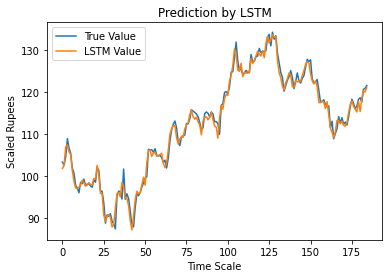

In [75]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled Rupees')
plt.legend()
plt.show()